In [1]:
# Load libraries
import pandas
import numpy
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = 16, 12

from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataset = pandas.read_csv(url, names=names)

In [3]:
# Summarize Data

# Descriptive statistics
# shape
print(dataset.shape)

(768, 9)


In [4]:
# types
print(dataset.dtypes)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [5]:
# head
print(dataset.head(20))

    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118

In [6]:
# descriptions, change precision to 3 places
pandas.set_option('precision', 3)
pandas.set_option('display.width', 200)
print(dataset.describe())

          preg     plas     pres     skin     test     mass     pedi      age    class
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000
mean     3.845  120.895   69.105   20.536   79.799   31.993    0.472   33.241    0.349
std      3.370   31.973   19.356   15.952  115.244    7.884    0.331   11.760    0.477
min      0.000    0.000    0.000    0.000    0.000    0.000    0.078   21.000    0.000
25%      1.000   99.000   62.000    0.000    0.000   27.300    0.244   24.000    0.000
50%      3.000  117.000   72.000   23.000   30.500   32.000    0.372   29.000    0.000
75%      6.000  140.250   80.000   32.000  127.250   36.600    0.626   41.000    1.000
max     17.000  199.000  122.000   99.000  846.000   67.100    2.420   81.000    1.000


In [7]:
# class distribution
print(dataset.groupby('class').size())

class
0    500
1    268
dtype: int64


In [8]:
# correlation
print(dataset.corr(method='pearson'))

        preg   plas   pres   skin   test   mass   pedi    age  class
preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544  0.222
plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264  0.467
pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240  0.065
skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114  0.075
test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042  0.131
mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036  0.293
pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034  0.174
age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000  0.238
class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238  1.000


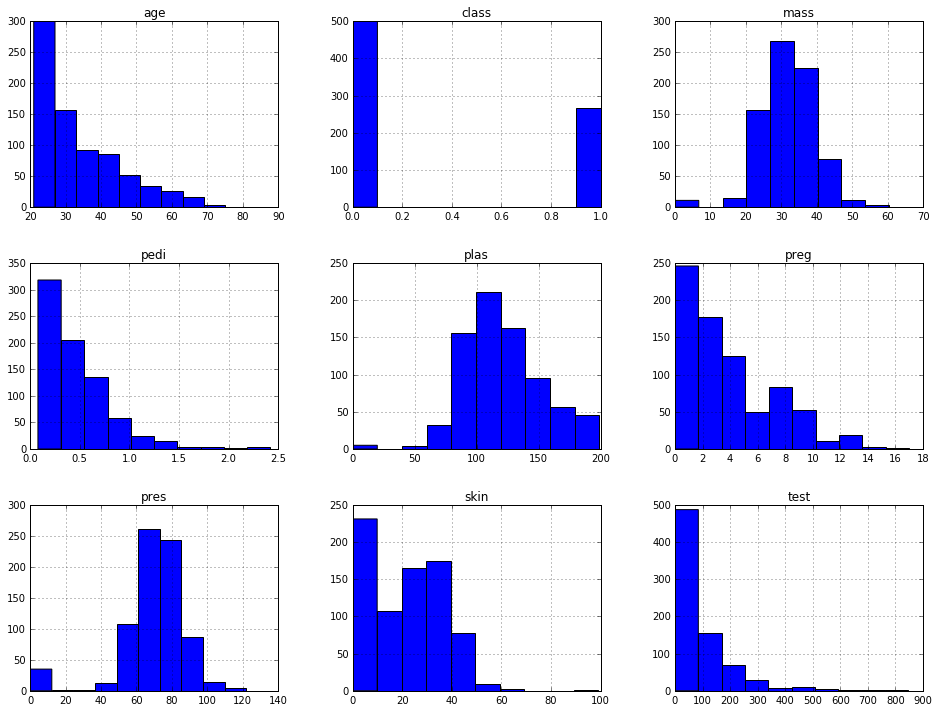

In [9]:
# Data visualizations

# histograms
dataset.hist()
plt.show()

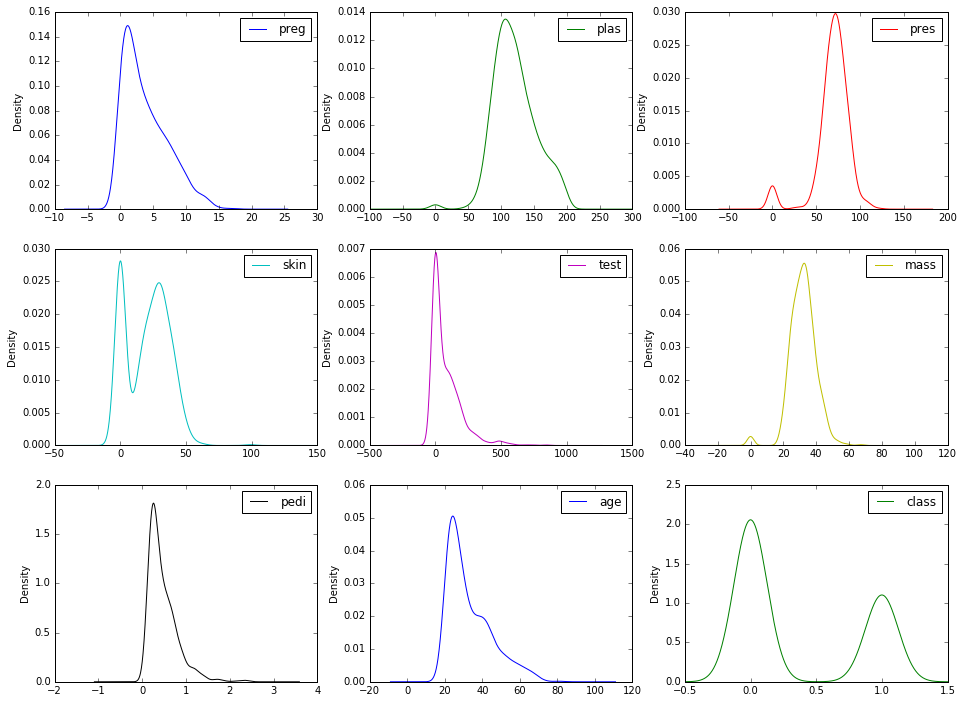

In [10]:
# density
dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

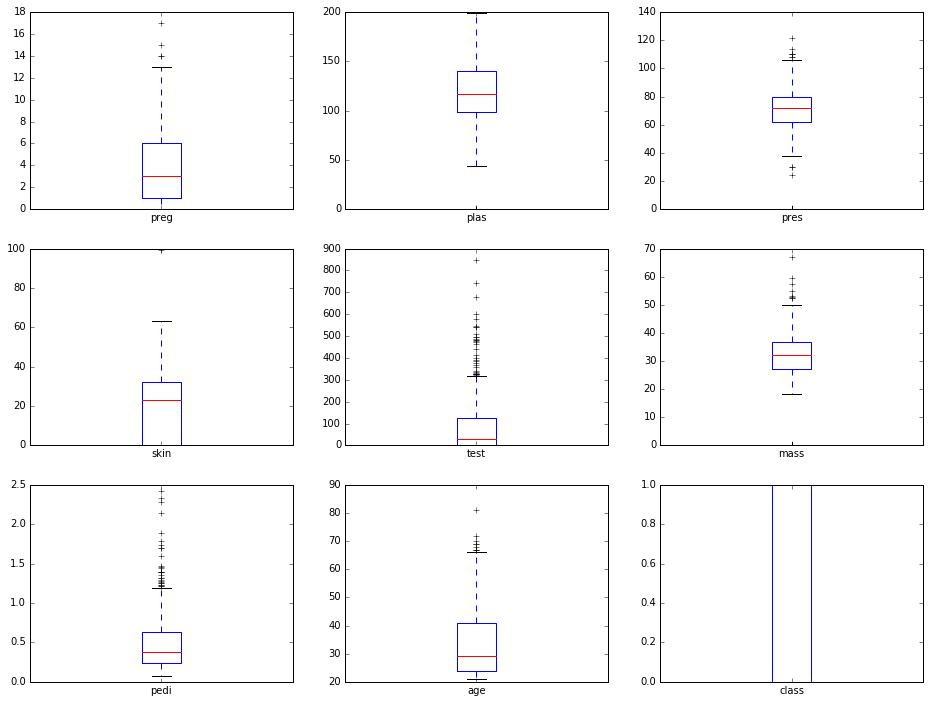

In [11]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

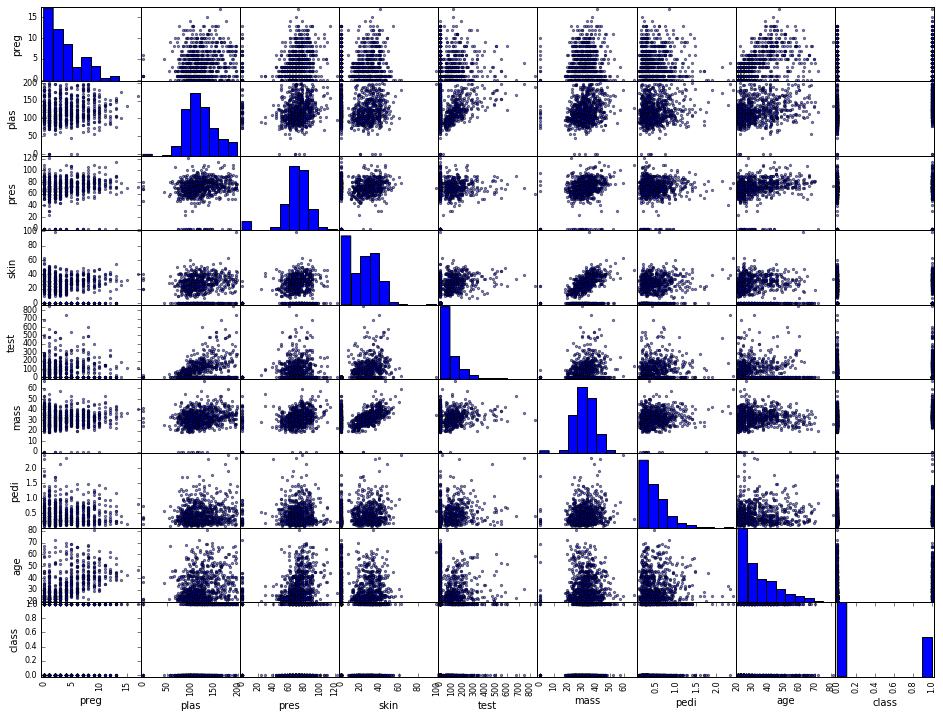

In [12]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

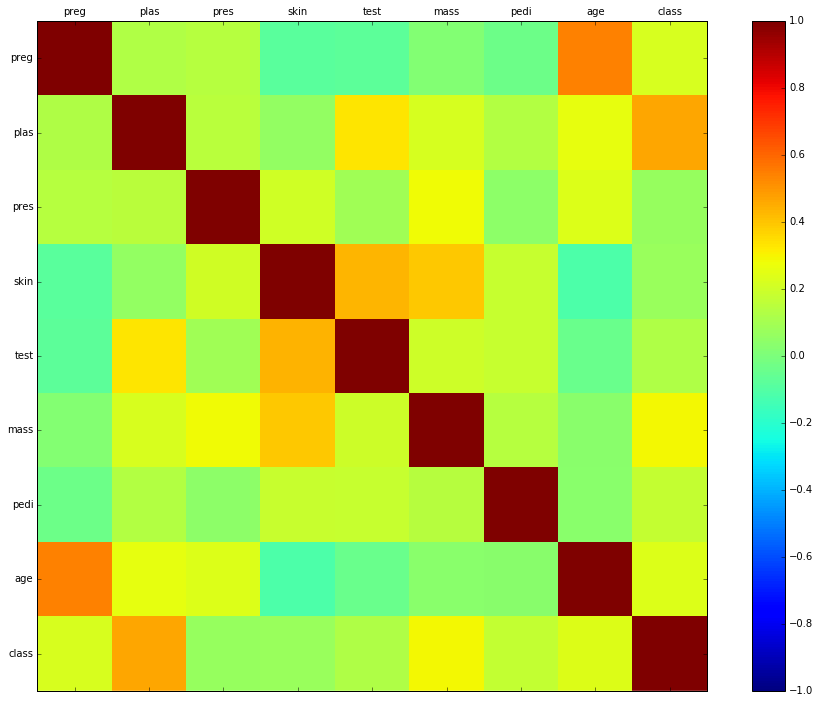

In [13]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [14]:
# Prepare Data

# Split-out validation dataset
array = dataset.values
X = array[:,0:8]
Y = array[:,8]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y, test_size=validation_size, 
                                                                                 random_state=seed)

In [15]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

In [16]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.776864 (0.060738)
LDA: 0.773559 (0.058283)
KNN: 0.710153 (0.064599)
CART: 0.666103 (0.036877)
NB: 0.750820 (0.050575)
SVM: 0.656293 (0.044581)


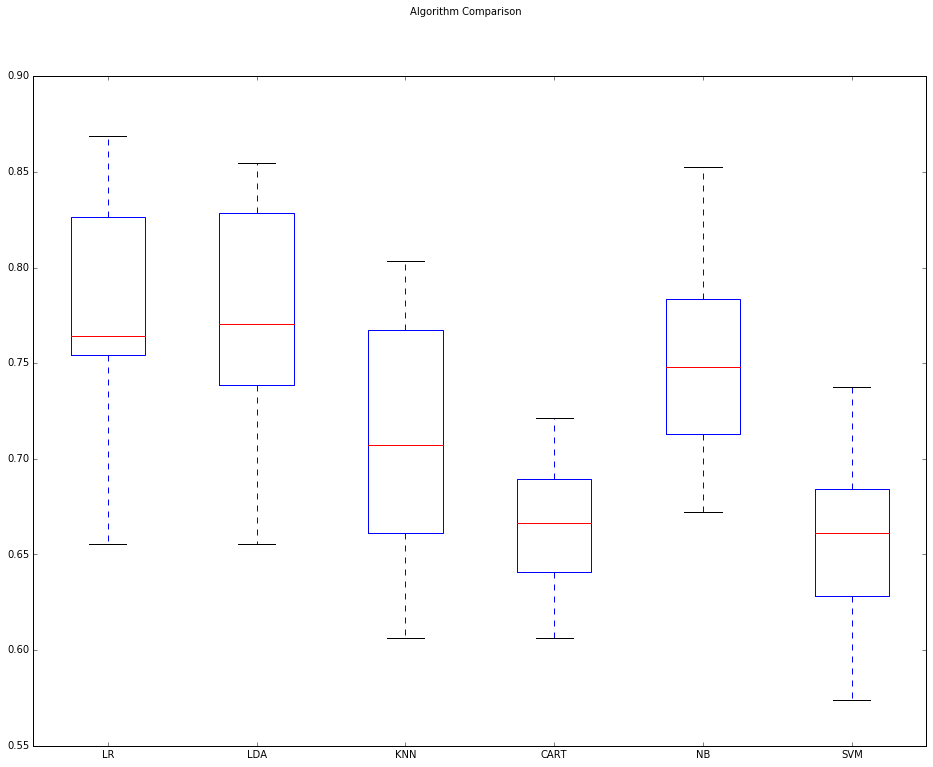

In [17]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [18]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.780037 (0.061129)
ScaledLDA: 0.773559 (0.058283)
ScaledKNN: 0.718297 (0.071563)
ScaledCART: 0.667636 (0.039667)
ScaledNB: 0.750820 (0.050575)
ScaledSVM: 0.752565 (0.064295)


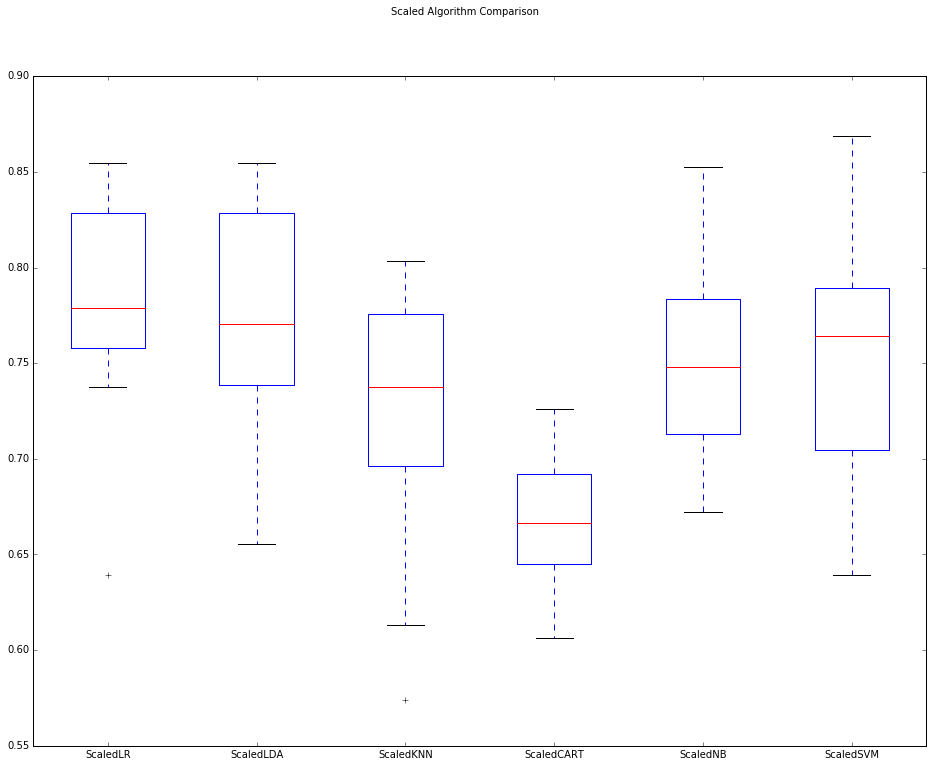

In [19]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [20]:
# Normalize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.757245 (0.055243)
ScaledLDA: 0.773559 (0.058283)
ScaledKNN: 0.718271 (0.072688)
ScaledCART: 0.688895 (0.060604)
ScaledNB: 0.750820 (0.050575)
ScaledSVM: 0.758884 (0.054881)


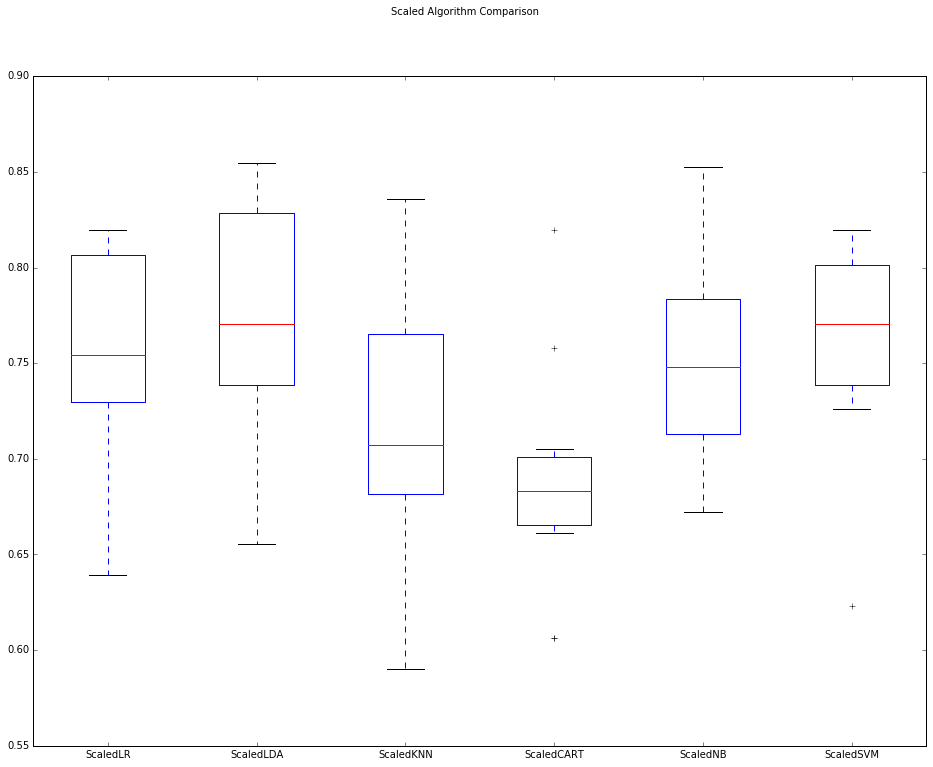

In [21]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [22]:
# Impute missing (delete?)
X_train_imputed = numpy.copy(X_train)
# plas
X_train_imputed[X_train_imputed[0::,1] == 0].shape
X_train_imputed[X_train_imputed[0::,1] == 0] = numpy.nan
# pres
X_train_imputed[X_train_imputed[0::,2] == 0].shape
X_train_imputed[X_train_imputed[0::,2] == 0] = numpy.nan
# mass
X_train_imputed[X_train_imputed[0::,5] == 0].shape
X_train_imputed[X_train_imputed[0::,5] == 0] = numpy.nan
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Imputer', Imputer(missing_values='NaN', strategy='mean')),('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Imputer', Imputer(missing_values='NaN', strategy='mean')),('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Imputer', Imputer(missing_values='NaN', strategy='mean')),('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Imputer', Imputer(missing_values='NaN', strategy='mean')),('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Imputer', Imputer(missing_values='NaN', strategy='mean')),('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Imputer', Imputer(missing_values='NaN', strategy='mean')),('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train_imputed, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.765389 (0.055062)
ScaledLDA: 0.758911 (0.058000)
ScaledKNN: 0.710127 (0.060014)
ScaledCART: 0.675806 (0.056103)
ScaledNB: 0.734506 (0.044526)
ScaledSVM: 0.734558 (0.044787)


In [23]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))
results = []
names = []
for name, model in ensembles:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: 0.724775 (0.063334)
ScaledGBM: 0.745822 (0.081214)
ScaledRF: 0.734426 (0.062325)
ScaledET: 0.723083 (0.058144)


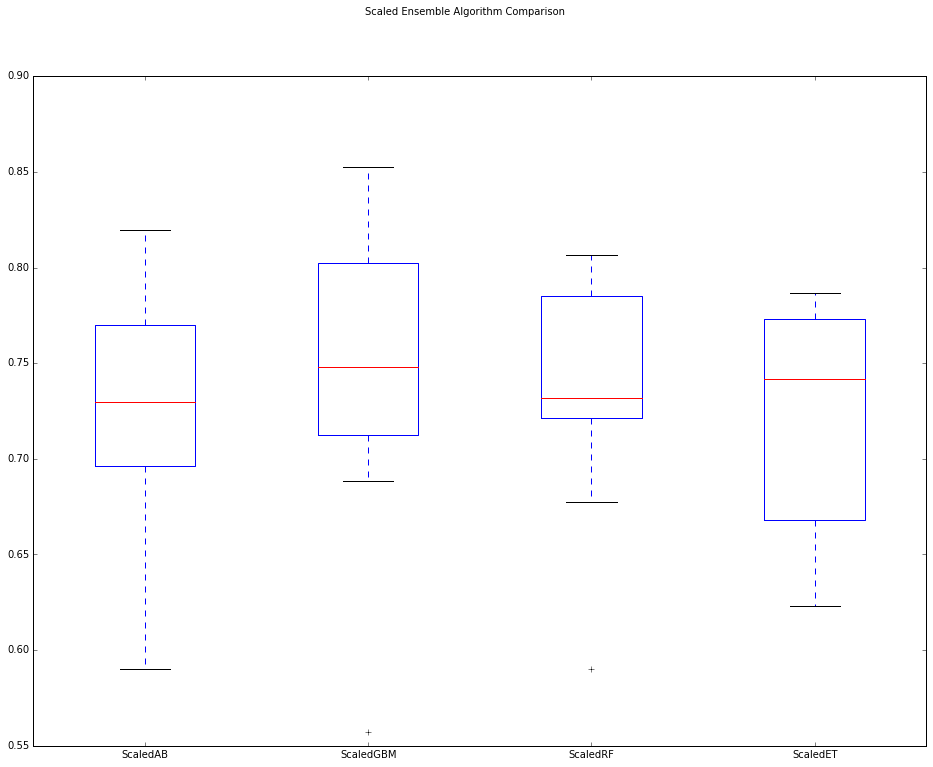

In [24]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()